# 3-Layer Neural Network for Non-linear Regression (PyTorch with Classes)

This notebook implements a 3-layer neural network using PyTorch's built-in functionality with proper class structure. We'll use PyTorch's `nn.Module`, `nn.Linear`, and other built-in components to create a clean, modular implementation.

We'll continue to use the same 3-variable non-linear function for our synthetic dataset to maintain consistency across implementations.

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the function to generate synthetic data
def true_function(X):
    """
    Non-linear function with 3 variables
    X should be a matrix with 3 columns
    """
    return 2 * torch.sin(X[:, 0]) + 3 * torch.cos(X[:, 1]) + 0.5 * X[:, 2]**2 + 0.1 * X[:, 0] * X[:, 1] * X[:, 2]

# Generate synthetic dataset
def generate_data(n_samples=1000):
    # Generate random inputs
    X = torch.FloatTensor(np.random.uniform(-2, 2, (n_samples, 3)))

    # Calculate true output values
    y_true = true_function(X)

    # Add some noise
    y = y_true + torch.FloatTensor(np.random.normal(0, 0.5, n_samples))

    return X, y.reshape(-1, 1)

# Generate training data
X_train, y_train = generate_data(1000)

# Generate test data
X_test, y_test = generate_data(200)

print(f"Training data shape: X = {X_train.shape}, y = {y_train.shape}")
print(f"Test data shape: X = {X_test.shape}, y = {y_test.shape}")

Training data shape: X = torch.Size([1000, 3]), y = torch.Size([1000, 1])
Test data shape: X = torch.Size([200, 3]), y = torch.Size([200, 1])


## Neural Network Implementation with PyTorch Classes

Now we'll implement our 3-layer neural network using PyTorch's built-in modules. We'll define a custom neural network class that inherits from `nn.Module` and uses PyTorch's predefined layers and activation functions.

In [2]:
# Define the neural network using PyTorch classes
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        super(NeuralNetwork, self).__init__()

        # Define the layers
        self.layer1 = nn.Linear(input_size, hidden1_size)
        self.layer2 = nn.Linear(hidden1_size, hidden2_size)
        self.layer3 = nn.Linear(hidden2_size, output_size)

        # Define activation function
        self.relu = nn.ReLU()

        # Initialize weights using He initialization
        nn.init.kaiming_normal_(self.layer1.weight)
        nn.init.kaiming_normal_(self.layer2.weight)
        nn.init.kaiming_normal_(self.layer3.weight)

    def forward(self, x):
        # First hidden layer
        x = self.layer1(x)
        x = self.relu(x)

        # Second hidden layer
        x = self.layer2(x)
        x = self.relu(x)

        # Output layer (no activation for regression)
        x = self.layer3(x)

        return x

# Create an instance of the neural network
input_size = 3
hidden1_size = 10
hidden2_size = 5
output_size = 1

model = NeuralNetwork(input_size, hidden1_size, hidden2_size, output_size)
print(model)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training loop
num_epochs = 3000
print_interval = 100
losses = []

start_time = time.time()
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if epoch % print_interval == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item():.6f}")

    # Store loss value
    if epoch % 10 == 0:
        losses.append(loss.item())

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

NeuralNetwork(
  (layer1): Linear(in_features=3, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch 0/3000, Loss: 11.151657
Epoch 100/3000, Loss: 1.741089
Epoch 200/3000, Loss: 0.610240
Epoch 300/3000, Loss: 0.411702
Epoch 400/3000, Loss: 0.387405
Epoch 500/3000, Loss: 0.371496
Epoch 600/3000, Loss: 0.356859
Epoch 700/3000, Loss: 0.345778
Epoch 800/3000, Loss: 0.332271
Epoch 900/3000, Loss: 0.321878
Epoch 1000/3000, Loss: 0.316396
Epoch 1100/3000, Loss: 0.313426
Epoch 1200/3000, Loss: 0.311681
Epoch 1300/3000, Loss: 0.310356
Epoch 1400/3000, Loss: 0.308794
Epoch 1500/3000, Loss: 0.306400
Epoch 1600/3000, Loss: 0.304739
Epoch 1700/3000, Loss: 0.303260
Epoch 1800/3000, Loss: 0.302225
Epoch 1900/3000, Loss: 0.301496
Epoch 2000/3000, Loss: 0.300812
Epoch 2100/3000, Loss: 0.300108
Epoch 2200/3000, Loss: 0.299067
Epoch 2300/3000, Loss: 0.296622
Epoch 2400/3000, Loss: 0

## Model Evaluation and Visualization

Now let's evaluate our PyTorch model on the test set and visualize the training progress and predictions.

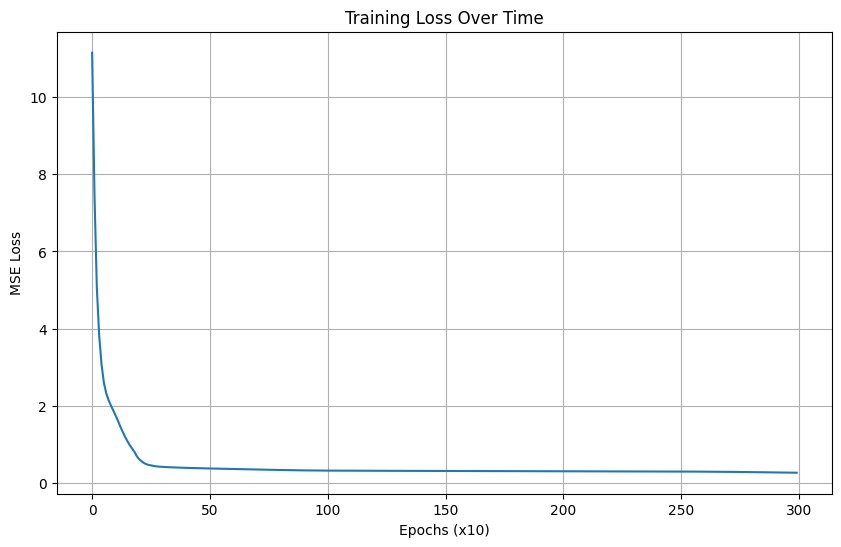

Test MSE Loss: 0.289202


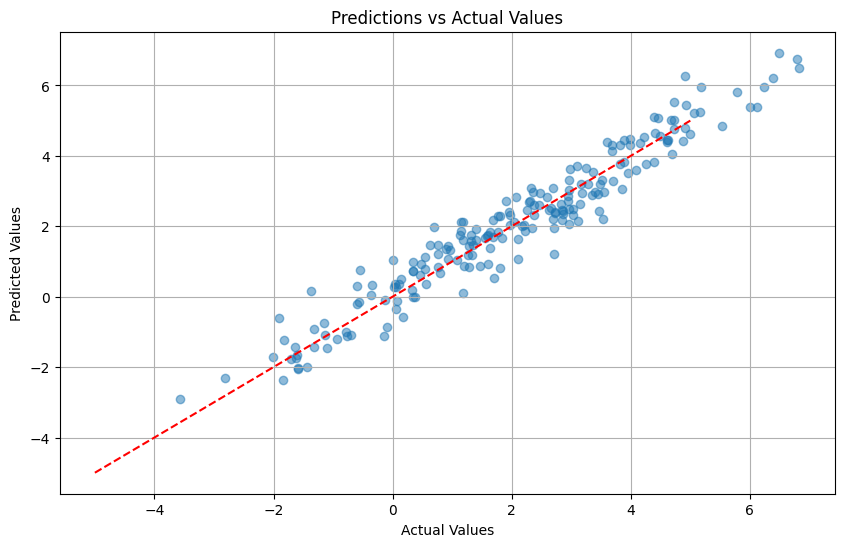

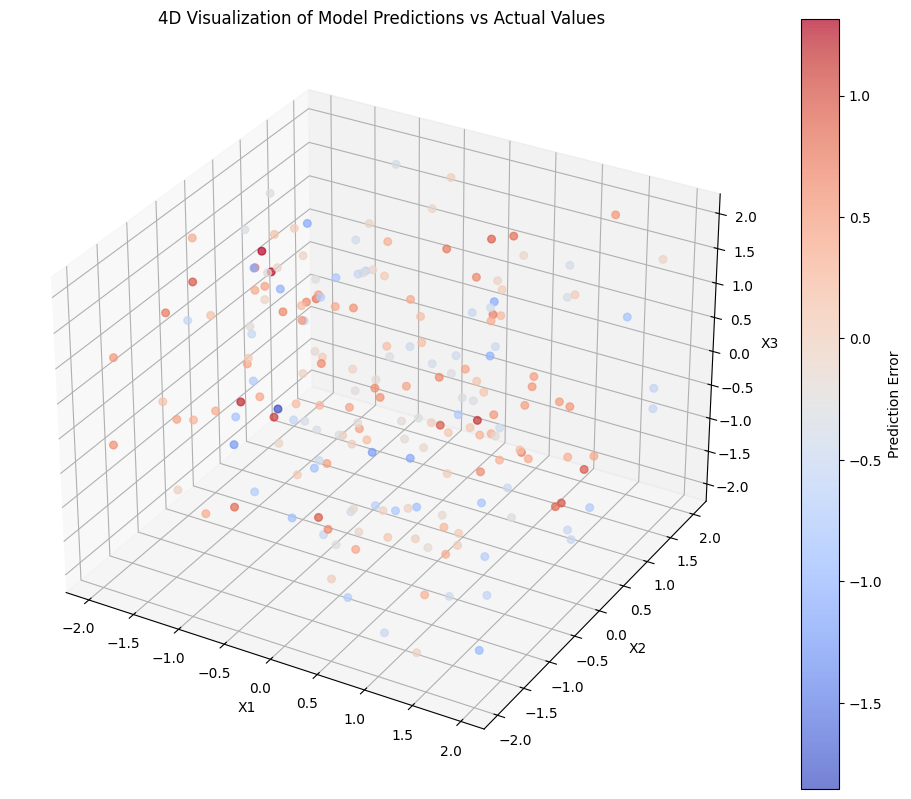

In [3]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epochs (x10)')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

# Evaluate on test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test).item()

print(f"Test MSE Loss: {test_loss:.6f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.numpy(), y_pred_test.numpy(), alpha=0.5)
plt.plot([-5, 5], [-5, 5], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.grid(True)
plt.show()

# Create a 4D visualization (3D plot with color as the 4th dimension)
def visualize_4d(X, y_true, y_pred, title):
    # Convert tensors to numpy
    X_np = X.numpy()
    y_true_np = y_true.numpy().flatten()
    y_pred_np = y_pred.numpy().flatten()

    # Create a 3D scatter plot with color as the 4th dimension
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Calculate prediction error for coloring
    error = y_true_np - y_pred_np

    # Create the scatter plot
    scatter = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2],
                          c=error,  # Use error for coloring
                          cmap=cm.coolwarm,
                          marker='o',
                          alpha=0.7,
                          s=30)

    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Prediction Error')

    # Set labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(title)

    # Show the plot
    plt.show()

# Generate sample data points for visualization
X_vis, y_vis = generate_data(200)

# Get predictions for visualization
model.eval()
with torch.no_grad():
    y_vis_pred = model(X_vis)

# Create 4D visualization
visualize_4d(X_vis, y_vis, y_vis_pred, '4D Visualization of Model Predictions vs Actual Values')

## 2D Slice Visualization

To better understand how our model performs across different values of our three input variables, we'll create 2D slice visualizations by fixing one variable and varying the other two.

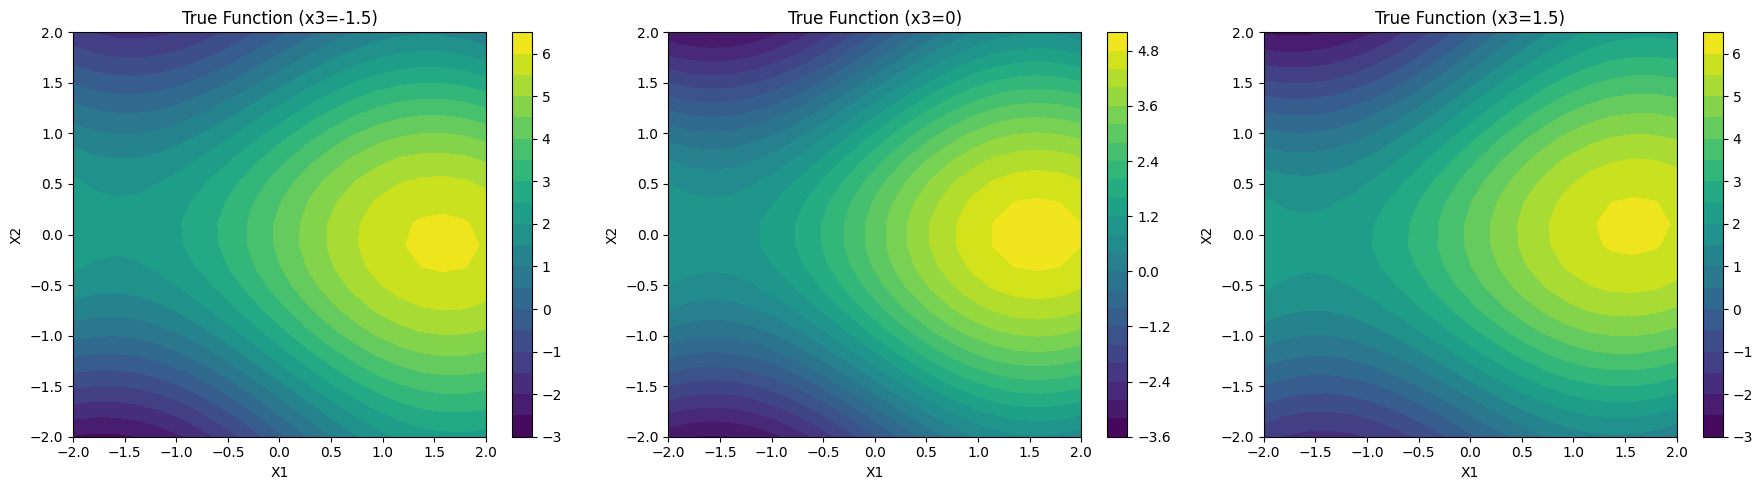

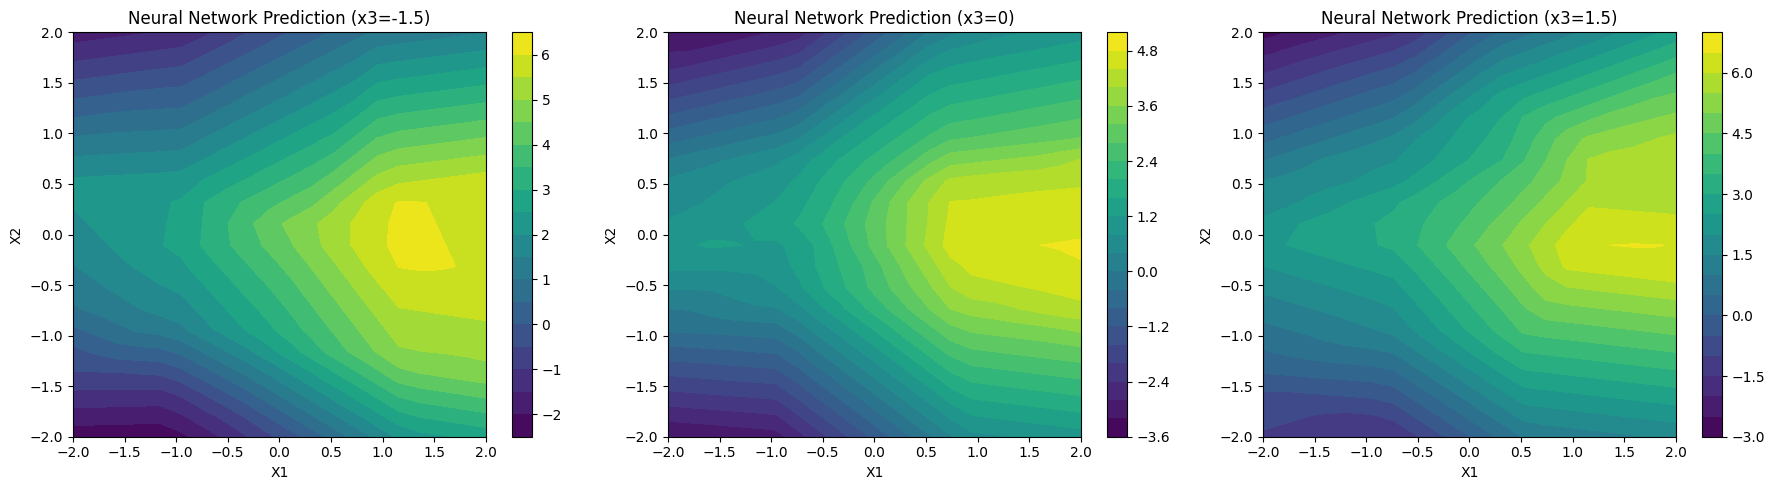

In [4]:
# Alternative visualization with 2D slices
def plot_2d_slices(X_range=2.0, grid_points=20):
    # Create a grid of points for visualization
    x1 = np.linspace(-X_range, X_range, grid_points)
    x2 = np.linspace(-X_range, X_range, grid_points)
    x3_values = [-1.5, 0, 1.5]  # Three fixed values for x3

    fig, axes = plt.subplots(1, len(x3_values), figsize=(18, 5))

    for i, x3 in enumerate(x3_values):
        # Create meshgrid for x1 and x2
        X1, X2 = np.meshgrid(x1, x2)

        # Create input data with fixed x3
        X_input_np = np.zeros((grid_points*grid_points, 3))
        X_input_np[:, 0] = X1.flatten()
        X_input_np[:, 1] = X2.flatten()
        X_input_np[:, 2] = x3

        # Convert to tensor
        X_input = torch.FloatTensor(X_input_np)

        # Get true values and predictions
        with torch.no_grad():
            y_true = true_function(X_input).reshape(grid_points, grid_points)
            y_pred = model(X_input).reshape(grid_points, grid_points)

            # Convert to numpy for plotting
            y_true_np = y_true.numpy()
            y_pred_np = y_pred.numpy()

        # Plot the true function
        im1 = axes[i].contourf(X1, X2, y_true_np, cmap='viridis', levels=20)
        axes[i].set_title(f'True Function (x3={x3})')
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

        # Add a colorbar
        plt.colorbar(im1, ax=axes[i])

    plt.tight_layout()
    plt.show()

    # Now plot the predicted function
    fig, axes = plt.subplots(1, len(x3_values), figsize=(18, 5))

    for i, x3 in enumerate(x3_values):
        # Create meshgrid for x1 and x2
        X1, X2 = np.meshgrid(x1, x2)

        # Create input data with fixed x3
        X_input_np = np.zeros((grid_points*grid_points, 3))
        X_input_np[:, 0] = X1.flatten()
        X_input_np[:, 1] = X2.flatten()
        X_input_np[:, 2] = x3

        # Convert to tensor
        X_input = torch.FloatTensor(X_input_np)

        # Get true values and predictions
        with torch.no_grad():
            y_true = true_function(X_input).reshape(grid_points, grid_points)
            y_pred = model(X_input).reshape(grid_points, grid_points)

            # Convert to numpy for plotting
            y_true_np = y_true.numpy()
            y_pred_np = y_pred.numpy()

        # Plot the predicted function
        im2 = axes[i].contourf(X1, X2, y_pred_np, cmap='viridis', levels=20)
        axes[i].set_title(f'Neural Network Prediction (x3={x3})')
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

        # Add a colorbar
        plt.colorbar(im2, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Generate and plot 2D slices
plot_2d_slices(X_range=2.0, grid_points=20)

## Summary

In this notebook, we've implemented a 3-layer neural network using PyTorch's built-in functionality with proper class structure. Key features of this implementation:

1. Utilized PyTorch's `nn.Module` as the base class for our neural network
2. Used `nn.Linear` for implementing the layers
3. Applied PyTorch's built-in activation functions
4. Leveraged PyTorch's optimizers for parameter updates
5. Maintained the same architecture (3 inputs, 10 hidden neurons, 5 hidden neurons, 1 output)

This implementation is much cleaner and more concise than our previous implementations, while achieving similar performance. The built-in functionality makes the code more readable and maintainable, without sacrificing flexibility.

The model successfully learned to approximate our non-linear 3-variable function, with the performance visualized through various plots and metrics.